In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import cwt, ricker

In [2]:
data = pd.read_csv("/Users/dgagne/data/cabauw_derived_data_20190312.csv")

In [31]:
data["zenith_0 m_degrees"]

0          74.785305
1          74.617537
2          74.513746
3          74.474228
4          74.499094
5          74.588274
6          74.741517
7          74.958392
8          75.238297
9          75.580461
10         75.983960
11         76.447721
12         76.970539
13         77.551086
14         78.187927
15         78.879533
16         79.624292
17         80.420529
18         81.266513
19         82.160470
20         83.100598
21         84.085073
22         85.112064
23         86.179736
24         87.286260
25         88.429817
26         89.608609
27         90.820855
28         92.064799
29         93.338713
             ...    
735114    110.438720
735115    109.374732
735116    108.265841
735117    107.114601
735118    105.923527
735119    104.695082
735120    103.431673
735121    102.135649
735122    100.809296
735123     99.454838
735124     98.074437
735125     96.670193
735126     95.244154
735127     93.798309
735128     92.334602
735129     90.854932
735130     89

In [27]:
pt_diff = data["virtual potential temperature_10 m_K"] - data["skin virtual potential temperature_0 m_K"]
ch = np.maximum(data["friction velocity_surface_m s-1"], 0.1) * data["temperature scale_surface_K"] \
    / pt_diff

In [34]:
data["friction velocity_surface_m s-1"]

0         0.403107
1         0.382195
2         0.437964
3         0.411857
4         0.359413
5         0.476261
6         0.499015
7         0.361803
8         0.317639
9         0.442742
10        0.346854
11        0.451589
12        0.416376
13        0.440010
14        0.495700
15        0.403526
16        0.540988
17        0.288897
18        0.391937
19        0.365772
20        0.442186
21        0.393961
22        0.375645
23        0.270749
24        0.456950
25        0.351322
26        0.298885
27        0.330263
28        0.261607
29        0.357519
            ...   
735114    0.264607
735115    0.269582
735116    0.292988
735117    0.305824
735118    0.290976
735119    0.275573
735120    0.316758
735121    0.268469
735122    0.276904
735123    0.303364
735124    0.290508
735125    0.286527
735126    0.273965
735127    0.254209
735128    0.188108
735129    0.201811
735130    0.253536
735131    0.263617
735132    0.264809
735133    0.302010
735134    0.281667
735135    0.

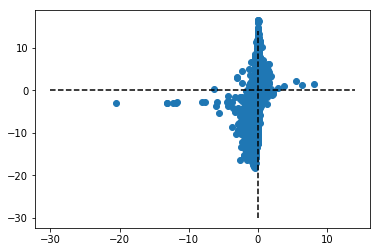

In [20]:
plt.scatter(data["temperature scale_surface_K"], pt_diff)
plt.plot(np.arange(-30, 15), np.zeros(45), 'k--')
plt.plot(np.zeros(45), np.arange(-30, 15),  'k--')

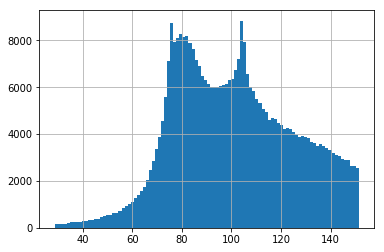

In [38]:
scale_diff = np.where((data["temperature scale_surface_K"] > 0) & (pt_diff < 0))[0]
data.loc[scale_diff, "zenith_0 m_degrees"].hist(bins=100)

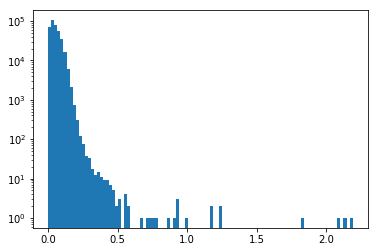

In [61]:
plt.hist(data.loc[scale_diff, "temperature scale_surface_K"], bins=100)
plt.gca().set_yscale("log")

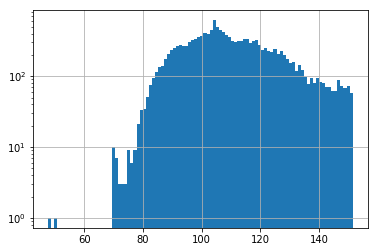

In [36]:
scale_diff = np.where((data["temperature scale_surface_K"] < 0) & (pt_diff > 0))[0]
data.loc[scale_diff, "zenith_0 m_degrees"].hist(bins=100)
plt.gca().set_yscale("log")
#data.loc[scale_diff, "bulk richardson_2 m_"].hist(bins=100)

In [53]:
np.count_nonzero((-data["temperature scale_surface_K"] > 0) == (data["sensible heat flux_surface_W m-2"] > 0))

735143

In [57]:
np.where((-data["temperature scale_surface_K"] > 0) != (data["sensible heat flux_surface_W m-2"] > 0))

(array([691546]),)

In [58]:
data.loc[691546, ["temperature scale_surface_K", "sensible heat flux_surface_W m-2"]]

temperature scale_surface_K        -9.51518e-06
sensible heat flux_surface_W m-2              0
Name: 691546, dtype: object

(0, 0.2)

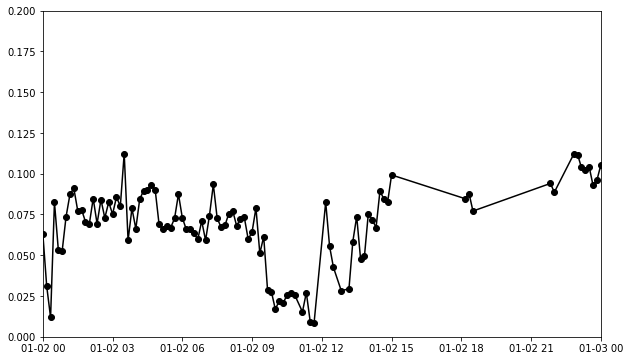

In [49]:
times = pd.DatetimeIndex(data["Time"])
plt.figure(figsize=(10, 6))
plt.plot(times[scale_diff], data.loc[scale_diff, "temperature scale_surface_K"], 'ko-')
plt.xlim('2014-01-02', '2014-01-03')
plt.ylim(0, 0.2)

In [40]:
scale_diff

array([     0,      1,      3, ..., 735140, 735141, 735143])

In [ ]:
scale_diff = np.where((data["temperature scale_surface_K"] > 0) & (pt_diff < 0))[0]
data.loc[scale_diff, "zenith_0 m_degrees"].hist(bins=100)

In [107]:
data["friction velocity_surface_m s-1"].min()

0.001

In [147]:
t_diff = (data["virtual potential temperature_10 m_K"] - data["skin virtual potential temperature_0 m_K"])

(array([1.000e+00, 1.000e+00, 4.000e+00, 8.000e+00, 2.200e+01, 5.000e+01,
        1.510e+02, 3.980e+02, 7.170e+02, 1.263e+03, 2.125e+03, 3.329e+03,
        4.586e+03, 5.987e+03, 7.661e+03, 8.864e+03, 8.754e+03, 9.068e+03,
        9.123e+03, 7.884e+03, 6.680e+03, 5.778e+03, 5.031e+03, 4.703e+03,
        4.370e+03, 3.933e+03, 3.340e+03, 3.105e+03, 2.742e+03, 2.307e+03,
        2.075e+03, 1.812e+03, 1.617e+03, 1.582e+03, 1.503e+03, 1.358e+03,
        1.269e+03, 1.157e+03, 1.059e+03, 8.950e+02, 8.390e+02, 7.940e+02,
        7.120e+02, 5.610e+02, 4.850e+02, 3.940e+02, 3.860e+02, 3.520e+02,
        3.890e+02, 3.080e+02, 2.460e+02, 2.030e+02, 2.090e+02, 1.340e+02,
        9.100e+01, 6.200e+01, 5.800e+01, 4.000e+01, 4.500e+01, 3.200e+01,
        3.400e+01, 1.400e+01, 1.400e+01, 5.000e+00, 8.000e+00, 6.000e+00,
        8.000e+00, 5.000e+00, 1.000e+00, 7.000e+00, 6.000e+00, 3.000e+00,
        2.000e+00, 6.000e+00, 1.000e+00, 4.000e+00, 2.000e+00, 2.000e+00,
        2.000e+00, 0.000e+00, 0.000e+0

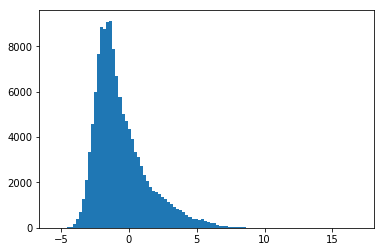

In [157]:
plt.hist(t_diff[idx], bins=100)

In [111]:
cq = np.maximum(data["friction velocity_surface_m s-1"], 0.1) * \
    data["moisture scale_surface_g kg-1"] / (data["skin saturation mixing ratio_0 m_g kg-1"] - data["mixing ratio_10 m_g kg-1"])

In [156]:
idx = data["zenith_0 m_degrees"] > 120
np.corrcoef(ch[idx], cq[idx])

array([[1.00000000e+00, 7.46854315e-09],
       [7.46854315e-09, 1.00000000e+00]])

(-0.1, 0.1)

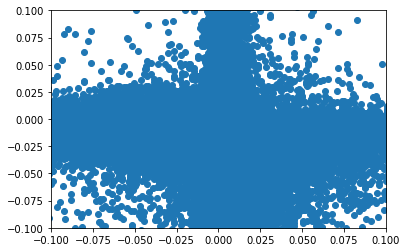

In [145]:
plt.scatter(ch[idx], cq[idx])
plt.xlim(-0.1, 0.1)
plt.ylim(-0.1, 0.1)

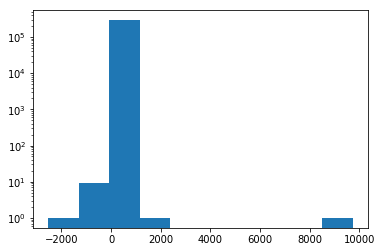

In [146]:
plt.hist(ch[idx])
plt.gca().set_yscale("log")

In [20]:
np.argmin(np.abs(ch - cq))

701656

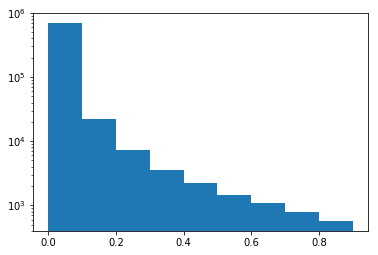

In [25]:
plt.hist(np.abs(ch - cq), bins=np.arange(0, 1, 0.1))
plt.gca().set_yscale("log")

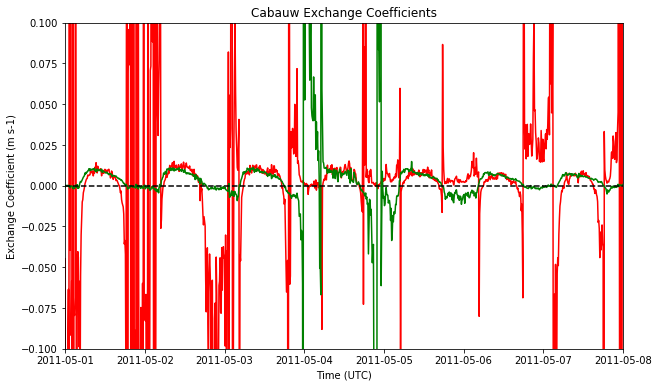

In [164]:
plt.figure(figsize=(10, 6))
plt.plot(pd.DatetimeIndex(data["Time"]), ch, 'r-', label="CH")
plt.plot(pd.DatetimeIndex(data["Time"]), cq, 'g-', label="CQ")
plt.plot(pd.DatetimeIndex(data["Time"]), np.zeros(data.shape[0]), 'k--')
plt.xlim("2011-05-01", "2011-05-08")
plt.ylabel("Exchange Coefficient (m s-1)")
plt.title("Cabauw Exchange Coefficients")
plt.xlabel("Time (UTC)")
plt.ylim(-0.1, 0.1)
plt.savefig("ch_cq_series.png", dpi=200, bbox_inches="tight")

(734258.0, 734265.0)

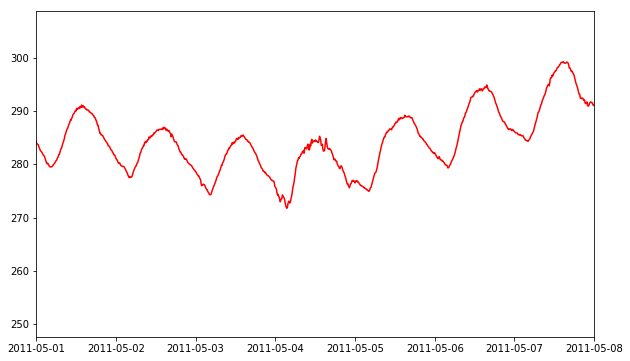

In [118]:
plt.figure(figsize=(10, 6))
plt.plot(pd.DatetimeIndex(data["Time"]), data["potential temperature_2 m_K"], 'r-')
#plt.plot(pd.DatetimeIndex(data["Time"]), cq, 'g-')
#plt.plot(pd.DatetimeIndex(data["Time"]), np.zeros(data.shape[0]), 'k--')
plt.xlim("2011-05-01", "2011-05-08")

(2, 10)

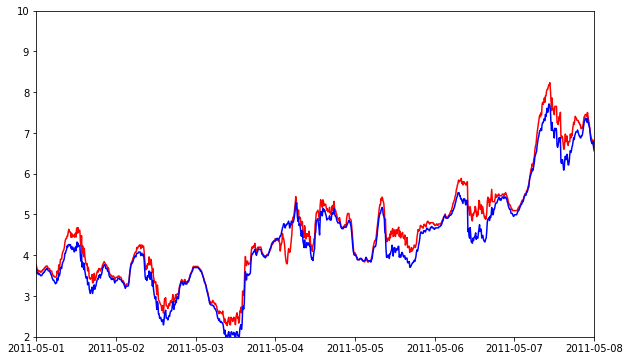

In [129]:
plt.figure(figsize=(10, 6))
plt.plot(pd.DatetimeIndex(data["Time"]), data["mixing ratio_2 m_g kg-1"], 'r-')
plt.plot(pd.DatetimeIndex(data["Time"]), data["mixing ratio_10 m_g kg-1"], 'b-')

#plt.plot(pd.DatetimeIndex(data["Time"]), data["skin saturation mixing ratio_0 m_g kg-1"], 'g-')
#plt.plot(pd.DatetimeIndex(data["Time"]), np.zeros(data.shape[0]), 'k--')
plt.xlim("2011-05-01", "2011-05-8")
plt.ylim(2, 10)

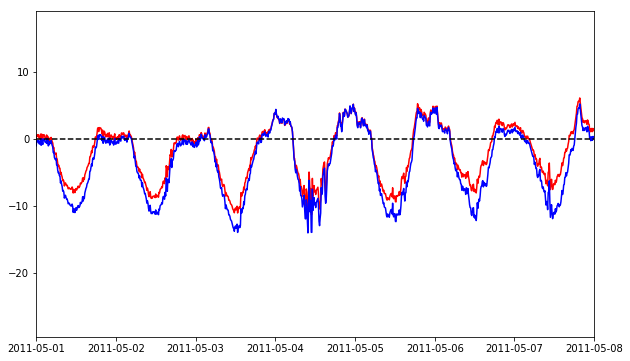

In [42]:
plt.figure(figsize=(10, 6))
plt.plot(pd.DatetimeIndex(data["Time"]), (data["potential temperature_10 m_K"] - data["skin potential temperature_0 m_K"]), 'r-')
plt.plot(pd.DatetimeIndex(data["Time"]), (data["virtual potential temperature_10 m_K"] - data["skin virtual potential temperature_0 m_K"]), 'b-')

plt.xlim("2011-05-01", "2011-05-08")
plt.plot(pd.DatetimeIndex(data["Time"]), np.zeros(data.shape[0]), 'k--')


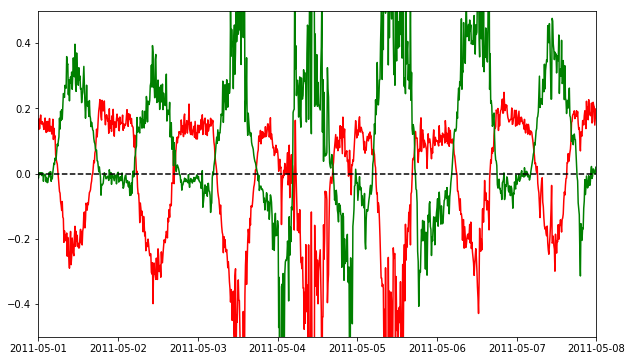

In [117]:
plt.figure(figsize=(10, 6))
plt.plot(pd.DatetimeIndex(data["Time"]), data["temperature scale_surface_K"], 'r-')
plt.plot(pd.DatetimeIndex(data["Time"]), data["moisture scale_surface_g kg-1"], 'g-')

plt.xlim("2011-05-01", "2011-05-08")
plt.ylim(-0.5, 0.5)
plt.plot(pd.DatetimeIndex(data["Time"]), np.zeros(data.shape[0]), 'k--')


(-10, 10)

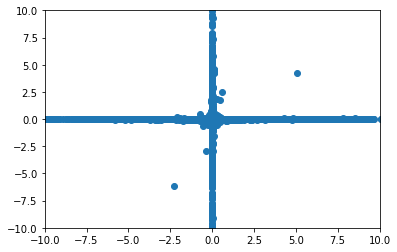

In [18]:
plt.scatter(ch, cq)
plt.xlim(-10, 10)
plt.ylim(-10, 10)

In [45]:
0.4 ** 2 / (np.log(2.0 / 0.1) + 10 * np.log(2.0 / 0.1)) ** 2

0.0001473426973242399

In [13]:
data.columns

Index(['Time', 'global horizontal irradiance_0 m_W m-2', 'zenith_0 m_degrees',
       'azimuth_0 m_degrees', 'temperature_2 m_K', 'temperature_10 m_K',
       'temperature_20 m_K', 'temperature_40 m_K', 'pressure_2 m_hPa',
       'potential temperature_2 m_K', 'potential temperature_10 m_K',
       'potential temperature_20 m_K', 'potential temperature_40 m_K',
       'virtual potential temperature_2 m_K',
       'virtual potential temperature_10 m_K',
       'virtual potential temperature_20 m_K',
       'virtual potential temperature_40 m_K', 'mixing ratio_2 m_g kg-1',
       'mixing ratio_10 m_g kg-1', 'mixing ratio_20 m_g kg-1',
       'mixing ratio_40 m_g kg-1', 'relative humidity_2 m_%',
       'relative humidity_10 m_%', 'relative humidity_20 m_%',
       'relative humidity_40 m_%', 'temperature change_4 m_K m-1',
       'temperature change_15 m_K m-1', 'temperature change_30 m_K m-1',
       'mixing ratio change_4 m_g kg-1 m-1',
       'mixing ratio change_15 m_g kg-1 m-1',
   

In [27]:
data

,Time,global horizontal irradiance_0 m_W m-2,zenith_0 m_degrees,azimuth_0 m_degrees,temperature_2 m_K,temperature_10 m_K,temperature_20 m_K,temperature_40 m_K,pressure_2 m_hPa,potential temperature_2 m_K,...,friction velocity_surface_m s-1,temperature scale_surface_K,moisture scale_surface_g kg-1,bulk richardson_10 m_,bulk richardson_2 m_,bulk richardson_10-2 m_,obukhov length_surface_m,sensible heat flux_surface_W m-2,latent heat flux_surface_W m-2,soil heat flux_surface_W m-2
0,2002-12-06 11:00:00,30.344975,74.785305,172.519924,276.94998,276.85000,276.85000,276.65000,1029.1,274.689482,...,0.403107,0.003836,0.018245,-0.028411,-0.005476,-0.001023,1137.096523,-2.006770,21.518290,-5.167618
1,2002-12-06 11:10:00,28.422215,74.617537,174.907488,276.94998,276.85000,276.85000,276.65000,1029.0,274.697109,...,0.382195,0.012033,0.020325,-0.026373,-0.005091,-0.000908,849.502293,-5.967686,22.725586,-5.155605
2,2002-12-06 11:20:00,26.398144,74.513746,177.300503,276.85000,276.75000,276.75000,276.55000,1029.0,274.597942,...,0.437964,-0.002425,0.010481,-0.028671,-0.005550,-0.000912,-1341.803444,1.378475,13.433453,-5.233712
3,2002-12-06 11:30:00,18.420874,74.474228,179.696403,276.75000,276.65000,276.65000,276.44998,1029.0,274.498755,...,0.411857,0.000890,0.007648,-0.032077,-0.006204,-0.001046,1186.169231,-0.475897,9.221571,-5.393440
4,2002-12-06 11:40:00,12.303274,74.499094,182.092586,276.65000,276.55000,276.55000,276.44998,1028.9,274.407188,...,0.359413,0.011364,0.013768,-0.028007,-0.005369,-0.001151,794.631232,-5.304996,14.490702,-5.619604
5,2002-12-06 11:50:00,15.182462,74.588274,184.486446,276.65000,276.55000,276.55000,276.35000,1028.7,274.422430,...,0.476261,0.004674,0.012582,-0.029540,-0.005651,-0.001273,1585.708192,-2.890719,17.544598,-5.892313
6,2002-12-06 12:00:00,14.469632,74.741517,186.875404,276.55000,276.44998,276.44998,276.25000,1028.7,274.323235,...,0.499015,0.009760,0.008668,-0.024309,-0.004677,-0.000914,1740.214882,-6.328166,12.670034,-6.189555
7,2002-12-06 12:10:00,19.445660,74.958392,189.256945,276.44998,276.35000,276.35000,276.25000,1028.7,274.224021,...,0.361803,0.011372,0.017391,-0.023756,-0.004539,-0.001054,804.158250,-5.347807,18.439133,-6.490038
8,2002-12-06 12:20:00,16.374928,75.238297,191.628644,276.35000,276.35000,276.25000,276.15000,1028.7,274.124846,...,0.317639,0.019588,0.019290,-0.026301,-0.005235,-0.000127,359.835704,-8.087300,17.956491,-6.775868
9,2002-12-06 12:30:00,6.115935,75.580461,193.988196,276.15000,276.05000,276.05000,275.85000,1028.7,273.926456,...,0.442742,0.002686,0.006806,-0.025688,-0.004948,-0.000937,1367.885906,-1.547663,8.840096,-7.034682


In [134]:
x = np.arange(0, 32 * np.pi, np.pi / 16)
y = np.sin(x)

(0, 6.283185307179586)

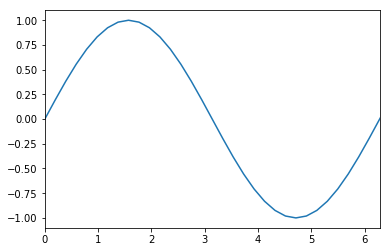

In [159]:
plt.plot(x, y)
plt.xlim(0, 2* np.pi)

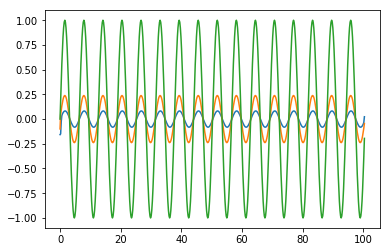

In [135]:
plt.plot(x, cwt(y, ricker, [1, 0.5]).T)
plt.plot(x, y)

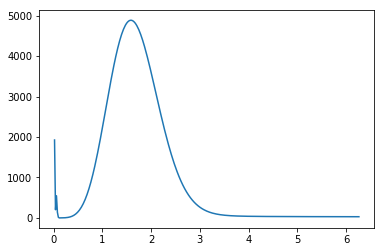

In [160]:
widths = np.arange(0.1, 32, 0.1)
plt.plot(widths * np.pi / 16, np.sum(cwt(y, ricker, widths) ** 2, axis=1))

In [137]:
np.argmax(np.sum(cwt(y, ricker, widths) ** 2, axis=1))

80

In [139]:
widths[80]

8.1

In [141]:
8.1 * np.pi / 16

1.5904312808798327